In [54]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [55]:
data = pd.read_csv("../MyDatasets/yield_df.csv")

data

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [56]:
data.rename(columns={"pesticides_tonnes":"Pesticide_Used(tonnes)", "Item": "Crop"}, inplace=True)

In [57]:
data.columns

Index(['Unnamed: 0', 'Area', 'Crop', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'Pesticide_Used(tonnes)', 'avg_temp'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Crop                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   Pesticide_Used(tonnes)         28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [59]:
data.isna().sum()

Unnamed: 0                       0
Area                             0
Crop                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
Pesticide_Used(tonnes)           0
avg_temp                         0
dtype: int64

In [60]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28237    False
28238    False
28239    False
28240    False
28241    False
Length: 28242, dtype: bool

In [61]:
data.duplicated().sum()

0

In [62]:
data.drop(columns="Unnamed: 0", inplace=True)

## EDA (Exploratory Data Analysis)

In [64]:
data.head()

,Area,Crop,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticide_Used(tonnes),avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [65]:
data["Crop"].value_counts()

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [66]:
data.columns.tolist()

['Area',
 'Crop',
 'Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'Pesticide_Used(tonnes)',
 'avg_temp']

In [67]:
data = data[data["Crop"].notna()]

data["Crop"] = data["Crop"].str.strip().str.split(",")

In [68]:
explode_data = data.explode("Crop", ignore_index=True)

explode_data["Crop"] = explode_data["Crop"].str.strip()

explode_data = explode_data[explode_data["Crop"] != '']

In [69]:
explode_data

,Area,Crop,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticide_Used(tonnes),avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,Rice,1990,23333,1485.0,121.00,16.37
3,Albania,paddy,1990,23333,1485.0,121.00,16.37
4,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
31625,Zimbabwe,paddy,2013,22581,657.0,2550.07,19.76
31626,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
31627,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
31628,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [70]:
explode_data["Crop"].value_counts()

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice                    3388
paddy                   3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [71]:
df1 = explode_data.groupby("Crop")["hg/ha_yield"].sum().reset_index()

df1

,Crop,hg/ha_yield
0,Cassava,307730510
1,Maize,149633801
2,Plantains and others,58958974
3,Potatoes,854351426
4,Rice,137994713
5,Sorghum,56634127
6,Soybeans,53924312
7,Sweet potatoes,344077024
8,Wheat,116158445
9,Yams,96676873


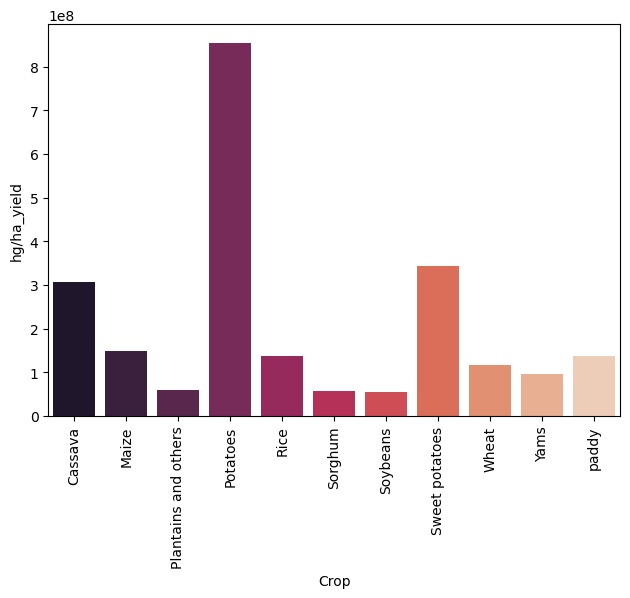

In [72]:
sns.barplot(data= df1, x="Crop", y="hg/ha_yield", hue = "Crop", palette = "rocket")
plt.tight_layout()
plt.xticks(rotation=90)


plt.show()

In [73]:
data["Area"].value_counts()

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

In [74]:
avg_rainfall_in_each_area_per_year = data.groupby("Area")["average_rain_fall_mm_per_year"].sum().reset_index()

avg_rainfall_in_each_area_per_year

,Area,average_rain_fall_mm_per_year
0,Albania,147015.0
1,Algeria,10146.0
2,Angola,165640.0
3,Argentina,217488.0
4,Armenia,35406.0
...,...,...
96,Ukraine,71190.0
97,United Kingdom,280600.0
98,Uruguay,209300.0
99,Zambia,187680.0


In [75]:
avg_temp_in_each_area = data.groupby("Area")["avg_temp"].sum().reset_index()

avg_temp_in_each_area

,Area,avg_temp
0,Albania,1613.71
1,Algeria,1993.27
2,Angola,3987.06
3,Argentina,6516.72
4,Armenia,603.60
...,...,...
96,Ukraine,1060.08
97,United Kingdom,2208.64
98,Uruguay,2733.92
99,Zambia,3875.92


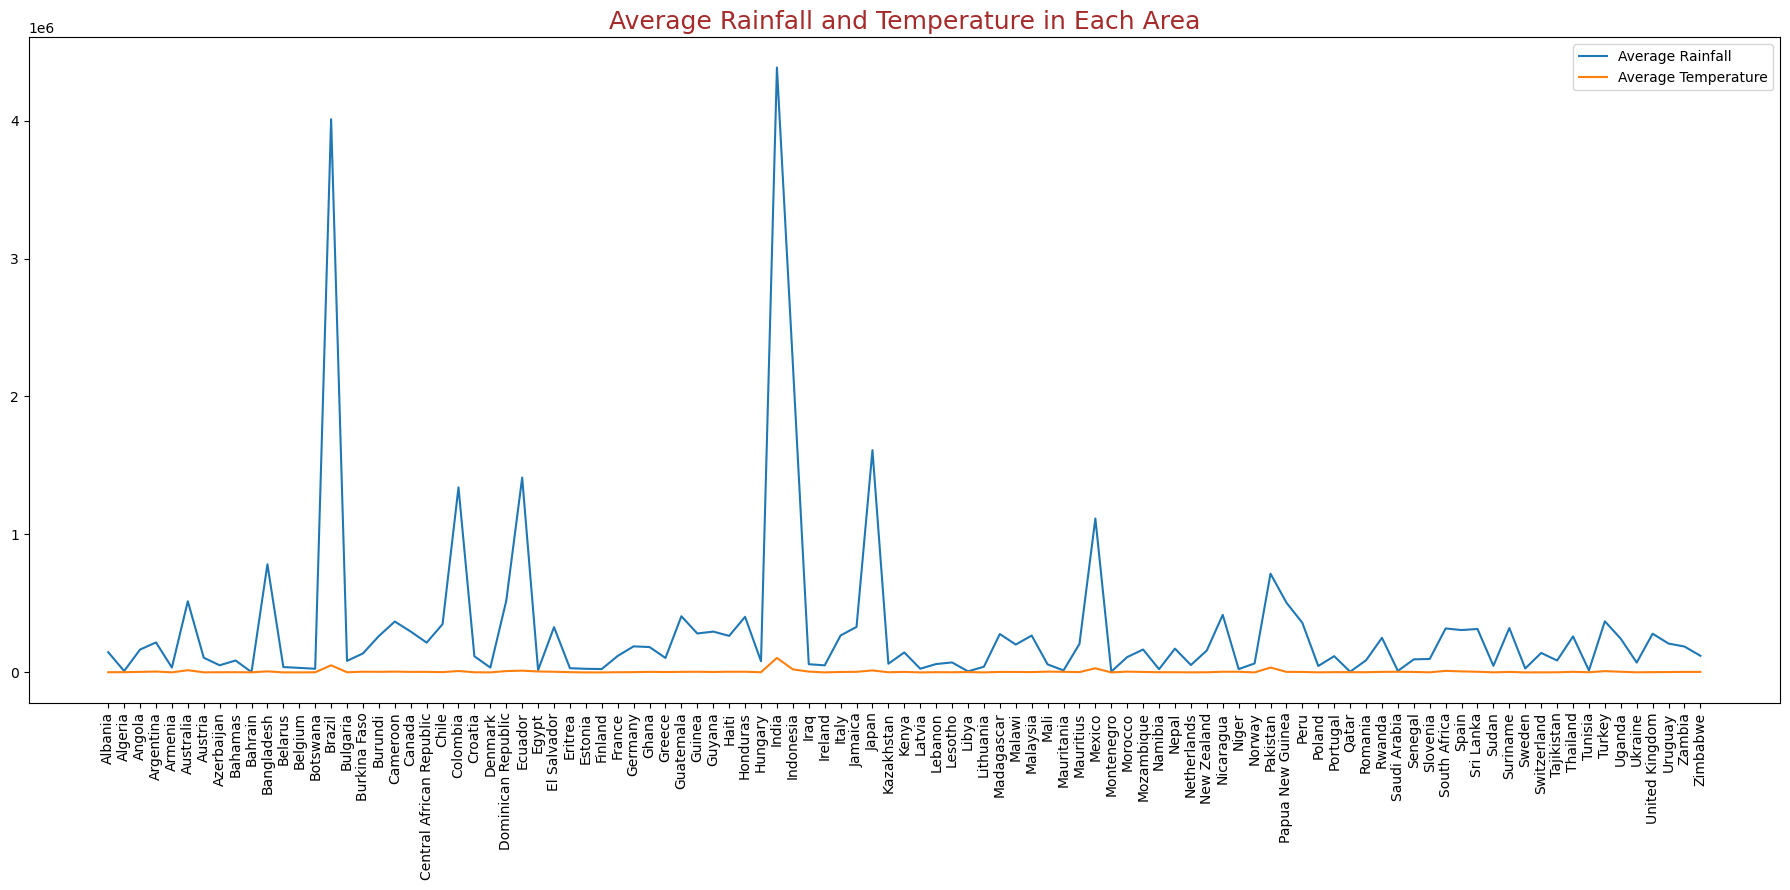

In [76]:
plt.figure(figsize=(18, 9))

plt.plot(avg_rainfall_in_each_area_per_year["Area"], avg_rainfall_in_each_area_per_year["average_rain_fall_mm_per_year"], label="Average Rainfall")
plt.plot(avg_temp_in_each_area["Area"], avg_temp_in_each_area["avg_temp"], label="Average Temperature")
plt.legend()
plt.title("Average Rainfall and Temperature in Each Area", fontsize=18, c="brown")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [77]:
item_counts = explode_data["Crop"].value_counts()

item_counts

Crop
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice                    3388
paddy                   3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [78]:
labels = item_counts.index

labels

Index(['Potatoes', 'Maize', 'Wheat', 'Rice', 'paddy', 'Soybeans', 'Sorghum',
       'Sweet potatoes', 'Cassava', 'Yams', 'Plantains and others'],
      dtype='object', name='Crop')

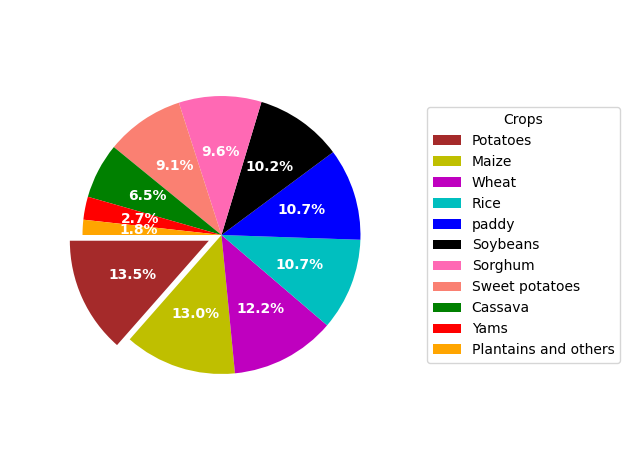

In [212]:
sizes = [4276, 4121, 3857, 3388, 3388, 3223, 3039, 2890, 2045, 847, 556]
the_explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

wedges, texts, autotexts = plt.pie(sizes, labels=None, autopct="%1.1f%%", startangle=180, 
                                   explode=the_explode, colors= np.array(['brown', 'y', 'm', 'c', 'b', 'k', 'hotpink', "salmon", "g", "r", "orange"]))
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.legend(wedges, labels, title="Crops", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()

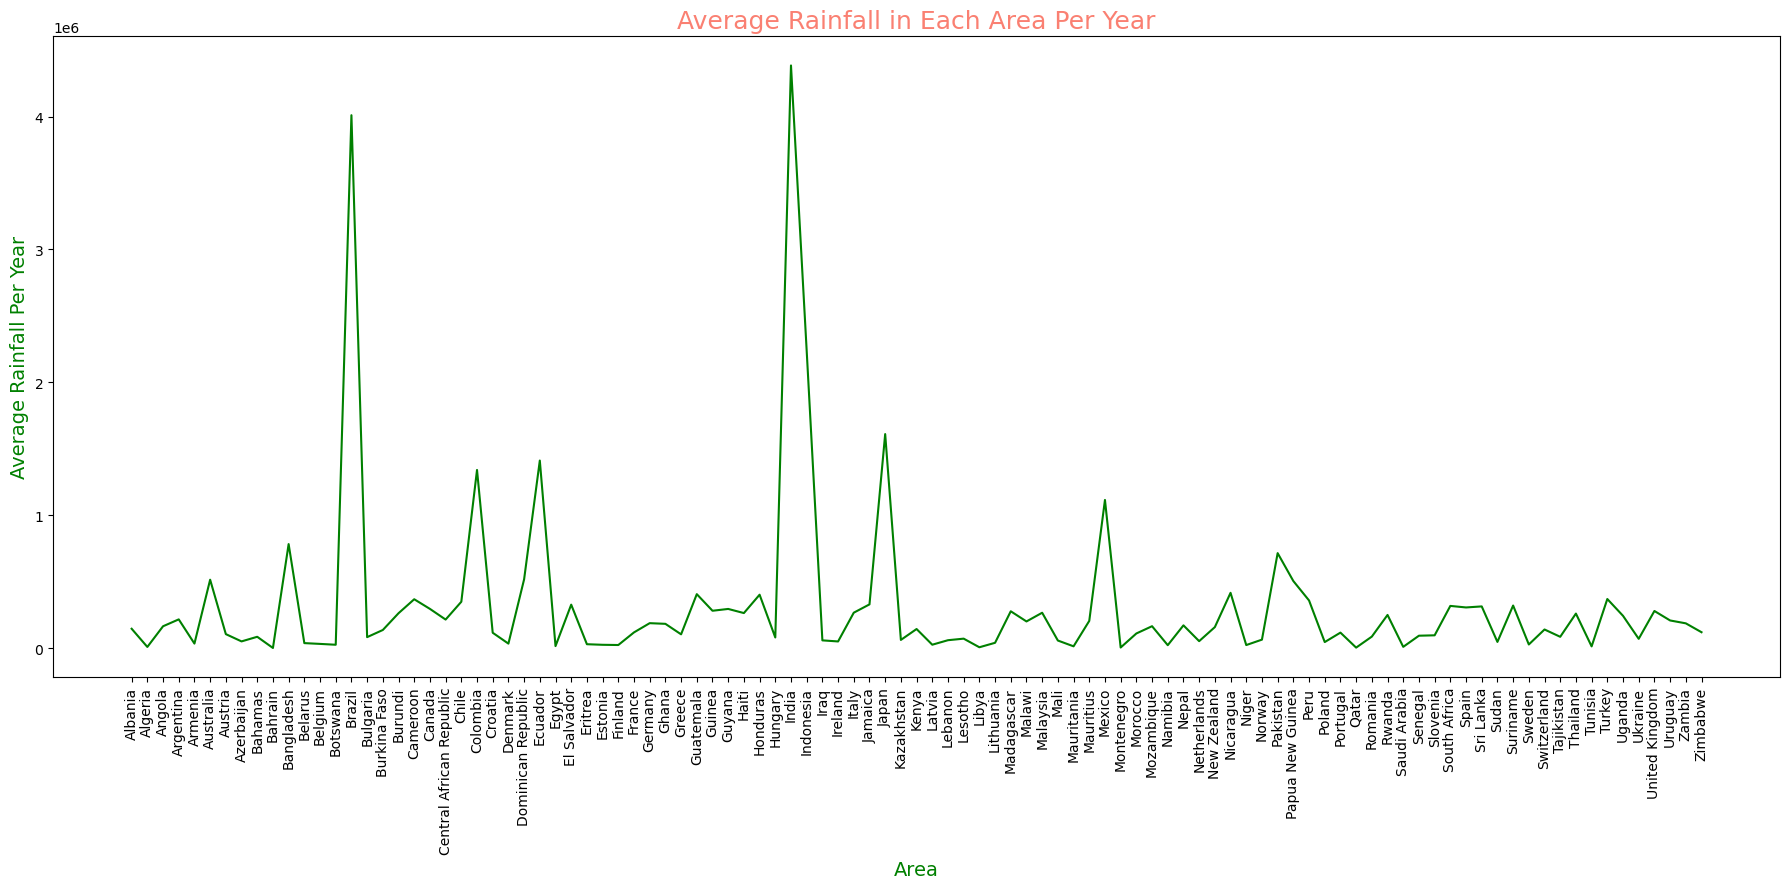

In [80]:
plt.figure(figsize=(18, 9))

plt.plot(avg_rainfall_in_each_area_per_year["Area"], avg_rainfall_in_each_area_per_year["average_rain_fall_mm_per_year"], color="green")
plt.title("Average Rainfall in Each Area Per Year", fontsize=18, c="salmon")
plt.xlabel("Area", fontsize=14, c="g")
plt.ylabel("Average Rainfall Per Year", fontsize=14, c="g")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [81]:
data.groupby("Area")["average_rain_fall_mm_per_year"].sum().reset_index()

,Area,average_rain_fall_mm_per_year
0,Albania,147015.0
1,Algeria,10146.0
2,Angola,165640.0
3,Argentina,217488.0
4,Armenia,35406.0
...,...,...
96,Ukraine,71190.0
97,United Kingdom,280600.0
98,Uruguay,209300.0
99,Zambia,187680.0


In [82]:
rainfall_per_year = data.groupby("Year")["average_rain_fall_mm_per_year"].sum().reset_index()

rainfall_per_year

,Year,average_rain_fall_mm_per_year
0,1990,1364117.0
1,1991,1363522.0
2,1992,1398871.0
3,1993,1400849.0
4,1994,1399275.0
5,1995,1399364.0
6,1996,1400468.0
7,1997,1405242.0
8,1998,1405242.0
9,1999,1404795.0


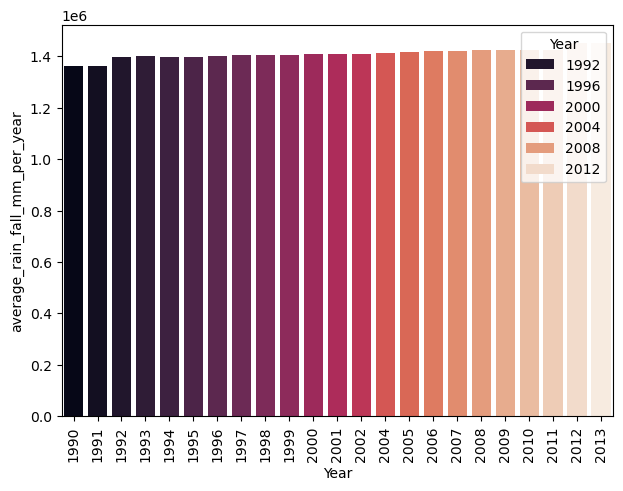

In [83]:
sns.barplot(data= rainfall_per_year, x="Year", y="average_rain_fall_mm_per_year", hue = "Year", palette = "rocket")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [84]:
data.head()

,Area,Crop,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticide_Used(tonnes),avg_temp
0,Albania,[Maize],1990,36613,1485.0,121.0,16.37
1,Albania,[Potatoes],1990,66667,1485.0,121.0,16.37
2,Albania,"[Rice, paddy]",1990,23333,1485.0,121.0,16.37
3,Albania,[Sorghum],1990,12500,1485.0,121.0,16.37
4,Albania,[Soybeans],1990,7000,1485.0,121.0,16.37


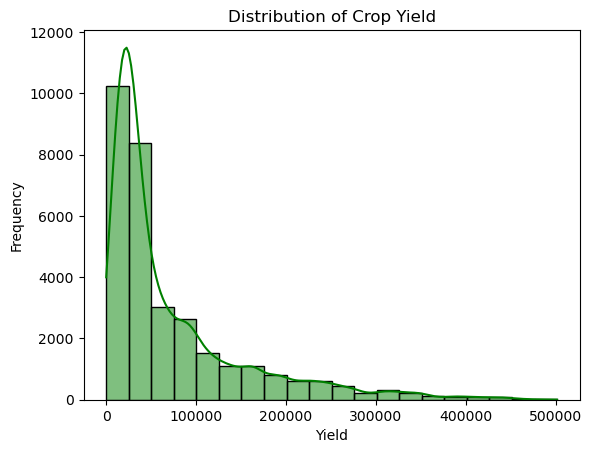

In [85]:
sns.histplot(data=explode_data, x="hg/ha_yield", bins=20, kde=True, color="g")
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

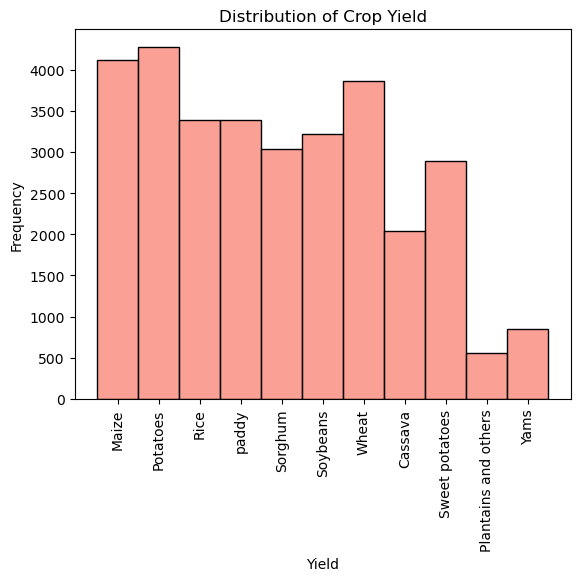

In [86]:
sns.histplot(data=explode_data, x="Crop", bins=20, color="salmon")
plt.xticks(rotation=90)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

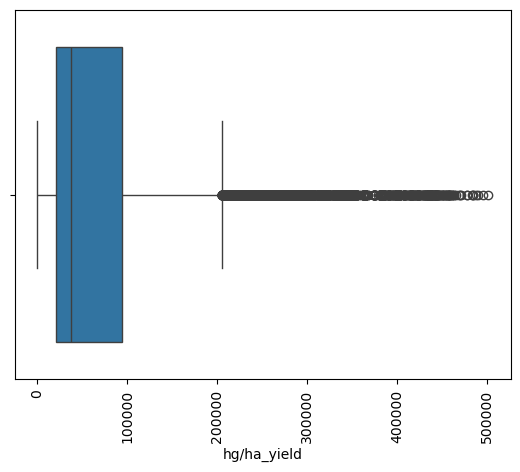

In [87]:
sns.boxplot(data=explode_data, x="hg/ha_yield")
plt.xticks(rotation=90)

plt.show()

In [88]:
explode_data["hg/ha_yield"].mean()

73162.65943724313

In [89]:
explode_data["hg/ha_yield"].median()

37607.0

In [90]:
explode_data["hg/ha_yield"].quantile(0.25)

20918.0

In [91]:
explode_data["hg/ha_yield"].quantile(0.5)

37607.0

In [92]:
explode_data["hg/ha_yield"].quantile(0.75)

94651.0

In [93]:
numeric_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'Pesticide_Used(tonnes)', 'avg_temp']

<Axes: >

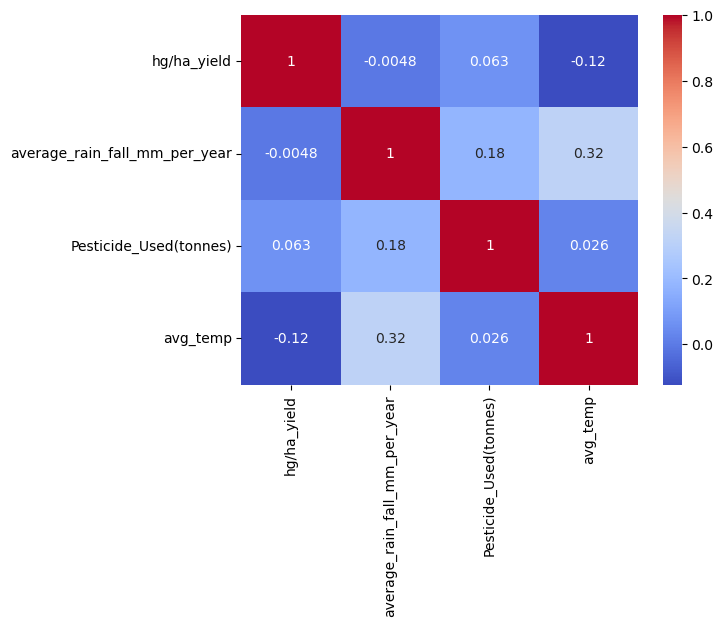

In [94]:
sns.heatmap(explode_data[numeric_columns].corr(), annot=True, cmap="coolwarm")

In [95]:
top_area_with_high_yield = explode_data.groupby("hg/ha_yield")["Pesticide_Used(tonnes)"].sum().reset_index()

In [96]:
top_area_with_high_yield.sort_values(by="Pesticide_Used(tonnes)", ascending=False, inplace=True)

In [97]:
top_area_with_high_yield

,hg/ha_yield,Pesticide_Used(tonnes)
6265,50071,8091116.00
6124,47860,7624826.00
6189,48956,7590572.00
5638,41271,7536760.00
5860,44049,7386324.00
...,...,...
4978,33604,0.04
858,8149,0.04
7288,66582,0.04
4002,25813,0.04


In [98]:
avg_rainfall_in_area = explode_data.groupby("hg/ha_yield")["average_rain_fall_mm_per_year"].sum().reset_index()

avg_rainfall_in_area.sort_values(by="average_rain_fall_mm_per_year", ascending=False, inplace=True)

In [99]:
merge_df = pd.merge(top_area_with_high_yield, avg_rainfall_in_area, how="inner", left_on="hg/ha_yield", right_on="hg/ha_yield")

In [100]:
merge_df

,hg/ha_yield,Pesticide_Used(tonnes),average_rain_fall_mm_per_year
0,50071,8091116.00,38742.0
1,47860,7624826.00,38742.0
2,48956,7590572.00,38742.0
3,41271,7536760.00,38742.0
4,44049,7386324.00,38742.0
...,...,...,...
11509,33604,0.04,1342.0
11510,8149,0.04,1342.0
11511,66582,0.04,1342.0
11512,25813,0.04,1342.0


In [101]:
top_30 = merge_df.sample(n=30, random_state=5)

In [102]:
top_30

,hg/ha_yield,Pesticide_Used(tonnes),average_rain_fall_mm_per_year
3258,14531,20334.00,1622.0
2979,180193,26870.86,692.0
4549,436811,8923.00,778.0
9557,14940,148.68,447.0
6731,41548,1846.00,608.0
1422,221667,149234.40,1664.0
7294,75283,1439.80,1712.0
1350,351358,159906.00,3204.0
5541,54000,4121.36,2857.0
6435,35023,2388.00,1113.0


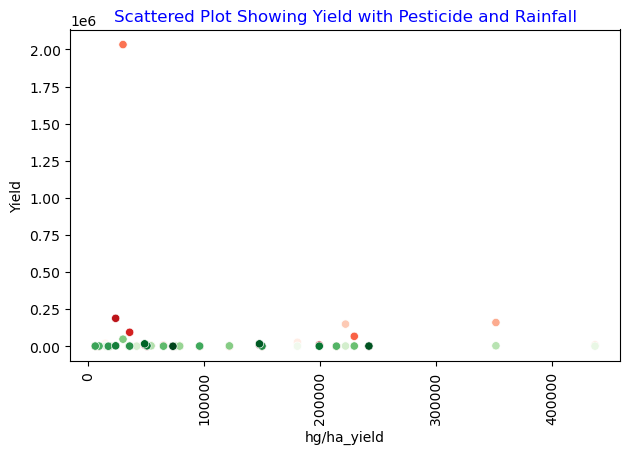

In [103]:
color= np.array([0, 5, 10, 15, 19, 20, 25, 30, 32, 35, 40, 45, 47, 50, 52, 55, 58, 60, 63, 65, 70, 72, 75, 80, 84, 85, 90, 93, 95, 100])

# plt.figure(figsize=(10,6))
sns.scatterplot(data=top_30, x="hg/ha_yield", y="Pesticide_Used(tonnes)", c=color, cmap="Reds")
sns.scatterplot(data=top_30, x="hg/ha_yield", y="average_rain_fall_mm_per_year", c=color, cmap="Greens")
plt.xticks(rotation=90)
plt.title("Scattered Plot Showing Yield with Pesticide and Rainfall", color="b")
plt.ylabel("Yield")
plt.tight_layout()

plt.show()

## Feature Encoding

In [105]:
x = explode_data.drop(columns=["hg/ha_yield"])

x

,Area,Crop,Year,average_rain_fall_mm_per_year,Pesticide_Used(tonnes),avg_temp
0,Albania,Maize,1990,1485.0,121.00,16.37
1,Albania,Potatoes,1990,1485.0,121.00,16.37
2,Albania,Rice,1990,1485.0,121.00,16.37
3,Albania,paddy,1990,1485.0,121.00,16.37
4,Albania,Sorghum,1990,1485.0,121.00,16.37
...,...,...,...,...,...,...
31625,Zimbabwe,paddy,2013,657.0,2550.07,19.76
31626,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76
31627,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76
31628,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76


In [106]:
y = explode_data["hg/ha_yield"]

y

0        36613
1        66667
2        23333
3        23333
4        12500
         ...  
31625    22581
31626     3066
31627    13142
31628    22222
31629    22888
Name: hg/ha_yield, Length: 31630, dtype: int64

## Label Encoder

In [108]:
explode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31630 entries, 0 to 31629
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           31630 non-null  object 
 1   Crop                           31630 non-null  object 
 2   Year                           31630 non-null  int64  
 3   hg/ha_yield                    31630 non-null  int64  
 4   average_rain_fall_mm_per_year  31630 non-null  float64
 5   Pesticide_Used(tonnes)         31630 non-null  float64
 6   avg_temp                       31630 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [109]:
categorical_columns = explode_data.select_dtypes(include=["object"]).columns.tolist()

categorical_columns

['Area', 'Crop']

In [110]:
x_encode = x.copy()

In [111]:
le = LabelEncoder()
for col in categorical_columns:
    x_encode[col] = le.fit_transform(x_encode[col])

In [112]:
x_encode["Area"].value_counts()

Area
42    4554
14    2530
62    1656
73    1656
5     1104
      ... 
30      42
12      39
87      32
9       29
63      24
Name: count, Length: 101, dtype: int64

In [113]:
x_encode.head()

,Area,Crop,Year,average_rain_fall_mm_per_year,Pesticide_Used(tonnes),avg_temp
0,0,1,1990,1485.0,121.0,16.37
1,0,3,1990,1485.0,121.0,16.37
2,0,4,1990,1485.0,121.0,16.37
3,0,10,1990,1485.0,121.0,16.37
4,0,5,1990,1485.0,121.0,16.37


## Feature Scaling

In [115]:
x_encode.head(10)

,Area,Crop,Year,average_rain_fall_mm_per_year,Pesticide_Used(tonnes),avg_temp
0,0,1,1990,1485.0,121.0,16.37
1,0,3,1990,1485.0,121.0,16.37
2,0,4,1990,1485.0,121.0,16.37
3,0,10,1990,1485.0,121.0,16.37
4,0,5,1990,1485.0,121.0,16.37
5,0,6,1990,1485.0,121.0,16.37
6,0,8,1990,1485.0,121.0,16.37
7,0,1,1991,1485.0,121.0,15.36
8,0,3,1991,1485.0,121.0,15.36
9,0,4,1991,1485.0,121.0,15.36


In [116]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(x_encode)

In [117]:
scaledX

array([[-1.73926309, -1.32645913, -1.6356265 ,  0.46565273, -0.61805748,
        -0.67943414],
       [-1.73926309, -0.66628208, -1.6356265 ,  0.46565273, -0.61805748,
        -0.67943414],
       [-1.73926309, -0.33619355, -1.6356265 ,  0.46565273, -0.61805748,
        -0.67943414],
       ...,
       [ 1.99213206,  0.32398351,  1.62516493, -0.6959723 , -0.5774174 ,
        -0.13749098],
       [ 1.99213206,  0.65407204,  1.62516493, -0.6959723 , -0.5774174 ,
        -0.13749098],
       [ 1.99213206,  0.98416056,  1.62516493, -0.6959723 , -0.5774174 ,
        -0.13749098]])

In [118]:
y

0        36613
1        66667
2        23333
3        23333
4        12500
         ...  
31625    22581
31626     3066
31627    13142
31628    22222
31629    22888
Name: hg/ha_yield, Length: 31630, dtype: int64

Train Test Split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 40)

In [121]:
x_train.shape

(25304, 6)

In [122]:
x_test.shape

(6326, 6)

## Model Building with Different Algorithms 

### Linear Regression

In [125]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [126]:
lin_reg_predict = lin_reg.predict(x_test)

lin_reg_predict

array([91812.48034181, 85250.99305902, 35978.73309146, ...,
       45188.55570975, 61563.50714046, 39583.13164079])

In [127]:
y_test

6897       9010
27467    200263
23950    132919
21250     37418
12908     28226
          ...  
22979     49571
8650      13019
25767     28328
11920     26271
13232     26789
Name: hg/ha_yield, Length: 6326, dtype: int64

In [128]:
r2_score(y_test, lin_reg_predict)

0.09832763362253383

In [129]:
mean_squared_error(y_test, lin_reg_predict)

6006511256.741342

In [130]:
(mean_squared_error(y_test, lin_reg_predict)) ** 0.5

77501.68550903484

### Decision Tree Regressor

In [132]:
tree_reg = DecisionTreeRegressor()

tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [133]:
tree_predict = tree_reg.predict(x_test)

In [134]:
r2_score(y_test, tree_predict)

0.9751689747595884

In [135]:
mean_squared_error(y_test, tree_predict)

165412447.11998102

In [136]:
mean_absolute_error(y_test, tree_predict)

3813.260037938666

In [137]:
(mean_squared_error(y_test, tree_predict)) ** 0.5

12861.277040791128

### Random Forest Regressor

In [139]:
rand_forest = RandomForestRegressor(random_state = 16)

rand_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=16)

In [140]:
forest_pred = rand_forest.predict(x_test)

In [141]:
r2_score(y_test, forest_pred)

0.9850012898901941

In [142]:
mean_squared_error(y_test, forest_pred)

99914253.19275537

In [143]:
mean_absolute_error(y_test, forest_pred)

3567.684470439456

In [144]:
(mean_squared_error(y_test, forest_pred)) ** 0.5

9995.711740179155

### XGBoost Regressor

In [146]:
XG_boost = XGBRegressor(random_state = 9)

In [147]:
XG_boost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=9, ...)

In [148]:
XGB_preds = XG_boost.predict(x_test)

In [149]:
r2_score(y_test, XGB_preds)

0.9703190326690674

In [150]:
(mean_squared_error(y_test, XGB_preds)) ** 0.5

14061.303339526155

## Hyperparameter Tuning

### RandomSearchCV for Random Forest

In [153]:
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 16,
 'verbose': 0,
 'warm_start': False}

In [154]:
parameter_grid = {'n_estimators':[100, 200, 300, 500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf':[1,2, 4], 'max_features': ['sqrt', 'log2']}

In [155]:
random_search = RandomizedSearchCV(estimator= rand_forest, param_distributions = parameter_grid, n_iter = 20, cv=5, scoring='r2', verbose=2, random_state=42, n_jobs=-1)

In [156]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=16),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [157]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [158]:
best_model = random_search.best_estimator_

In [159]:
y_pred = best_model.predict(x_test)

In [160]:
r2_score(y_test, y_pred)

0.9754707311224816

In [161]:
mean_squared_error(y_test, y_pred)

163402290.1515544

In [162]:
(mean_squared_error(y_test, y_pred)) ** 0.5

12782.890524116774

### GridSearchCV for Random Forest

In [164]:
fine_grid = {'n_estimators':[280, 300, 320], 'max_depth': [25, 30, 35], 'min_samples_split': [2, 4], 'min_samples_leaf':[1,2,], 'max_features': ['sqrt']}

In [165]:
grid_search = GridSearchCV(estimator = rand_forest, param_grid = fine_grid, scoring = 'r2', cv = 4, n_jobs = -1)

In [166]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=16), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [280, 300, 320]},
             scoring='r2')

In [167]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 320}

In [168]:
fine_model = grid_search.best_estimator_

In [169]:
Y_preds = fine_model.predict(x_test)

In [170]:
r2_score(y_test, Y_preds)

0.9751809512714675

In [171]:
(mean_squared_error(y_test, Y_preds)) ** 0.5

12858.17503808293

## Feature Importance

In [180]:
importance = rand_forest.feature_importances_

importance

array([0.05500889, 0.61118818, 0.03026316, 0.08459075, 0.10578812,
       0.1131609 ])

In [182]:
features = x.columns

features

Index(['Area', 'Crop', 'Year', 'average_rain_fall_mm_per_year',
       'Pesticide_Used(tonnes)', 'avg_temp'],
      dtype='object')

In [184]:
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})

importance_df

,Feature,Importance
0,Area,0.055009
1,Crop,0.611188
2,Year,0.030263
3,average_rain_fall_mm_per_year,0.084591
4,Pesticide_Used(tonnes),0.105788
5,avg_temp,0.113161


In [186]:
importance_df.columns

Index(['Feature', 'Importance'], dtype='object')

In [188]:
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

In [190]:
importance_df

,Feature,Importance
1,Crop,0.611188
5,avg_temp,0.113161
4,Pesticide_Used(tonnes),0.105788
3,average_rain_fall_mm_per_year,0.084591
0,Area,0.055009
2,Year,0.030263


[]

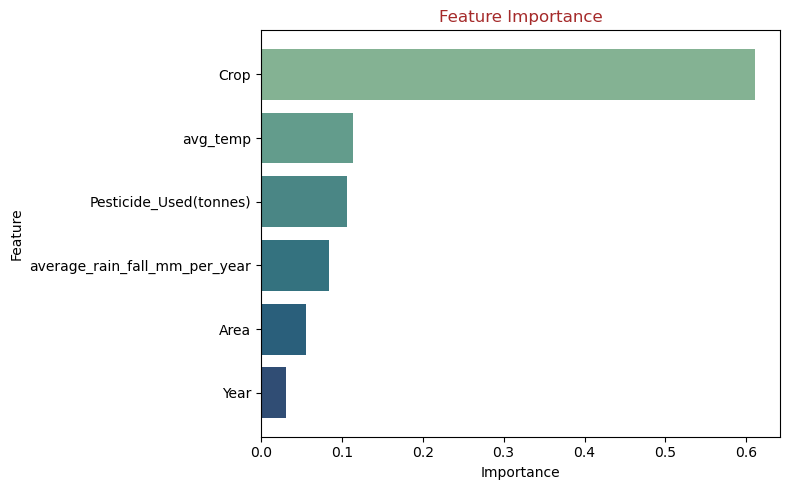

In [192]:
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", hue="Feature", palette="crest")
plt.title("Feature Importance", color="brown")
plt.tight_layout()
plt.plot()

## Cross Validation

### Cross Validation for XGBoost

In [196]:
score = cross_val_score(XG_boost, x_train, y_train, cv=15, scoring= "r2")

In [197]:
score

array([0.97649533, 0.97218812, 0.97560507, 0.97126186, 0.96545762,
       0.97112519, 0.97703314, 0.97478783, 0.97696233, 0.97372156,
       0.97077495, 0.97263777, 0.97570592, 0.97269905, 0.97014445])

### Cross Validation for Random Forest

In [201]:
score_rf = cross_val_score(rand_forest, x_train, y_train, cv=20, scoring="r2")

score_rf

array([0.99017373, 0.98288954, 0.98951378, 0.98465287, 0.9858648 ,
       0.98382718, 0.98098278, 0.98289246, 0.99114037, 0.9913538 ,
       0.98518937, 0.98951047, 0.98635407, 0.98701717, 0.98726545,
       0.98531377, 0.98685643, 0.98708222, 0.98885185, 0.98490897])